In [2]:
# Import drive library so we'll be able to access the .csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import os

In [4]:
# Access the file location
os.chdir("/content/drive/MyDrive/Loan Dataset")

In [5]:
# Define the whole dataset as 'loan'
loan = pd.read_csv("loan_data_2007_2014.csv")

/tmp/ipython-input-2469554926.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan_data_2007_2014.csv")


In [6]:
# Find out the shape of the dataset (rows, columns)
loan.shape

(466285, 75)

In [7]:
# Get info about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# See distinct data from "loan_status" column
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

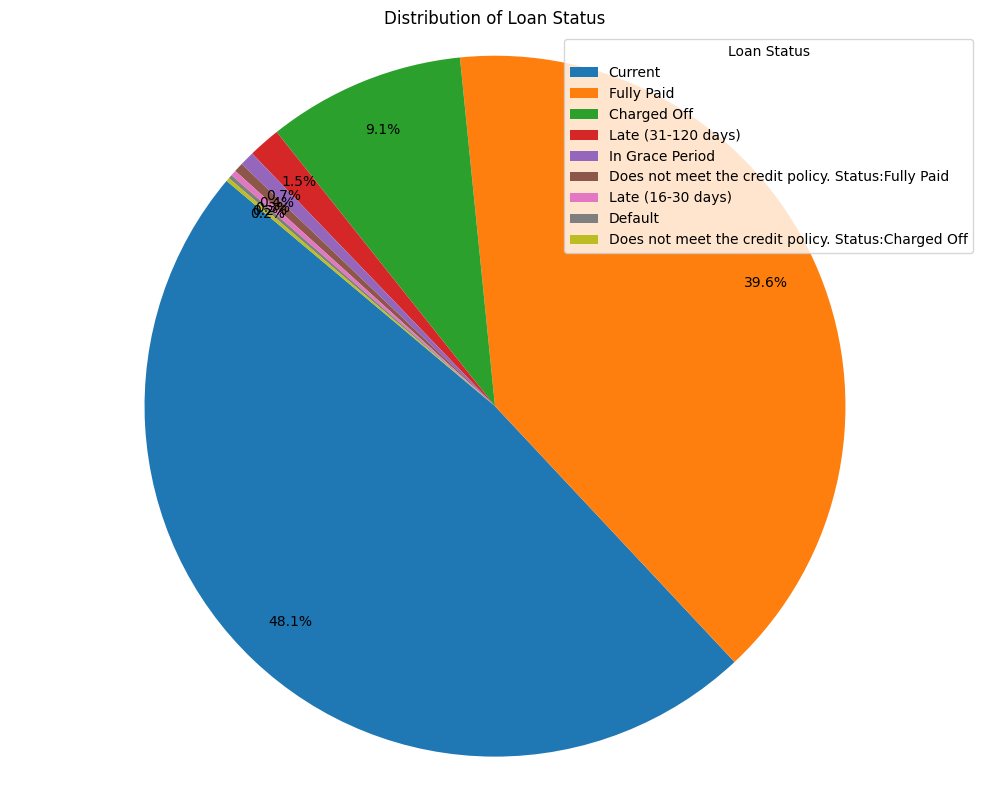

In [9]:
import matplotlib.pyplot as plt

# Get the value counts of the 'loan_status' column
loan_status_counts = loan['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(loan_status_counts, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Loan Status')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend with labels from loan_status_counts.index
plt.legend(wedges, loan_status_counts.index, title="Loan Status", loc="upper right", bbox_to_anchor=(1, 1))

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [10]:
# Create a new column based on the loan_status column that will be our target variable
loan['bad_loan'] = np.where(loan.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# 0 = bad loan, 1 = good loan

In [11]:
# See the updated dataframe
loan

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,1
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,1
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,1


In [12]:
# Check the columns that have > 50% missing values
missing_values = loan.isnull().mean()
missing_values[missing_values > 0.5]

,0
desc,0.729820
mths_since_last_delinq,0.536906
mths_since_last_record,0.865666
mths_since_last_major_derog,0.787739
annual_inc_joint,1.000000
dti_joint,1.000000
verification_status_joint,1.000000
open_acc_6m,1.000000
open_il_6m,1.000000
open_il_12m,1.000000


In [13]:
loan.duplicated().sum()

np.int64(0)

Outlier Detection using IQR


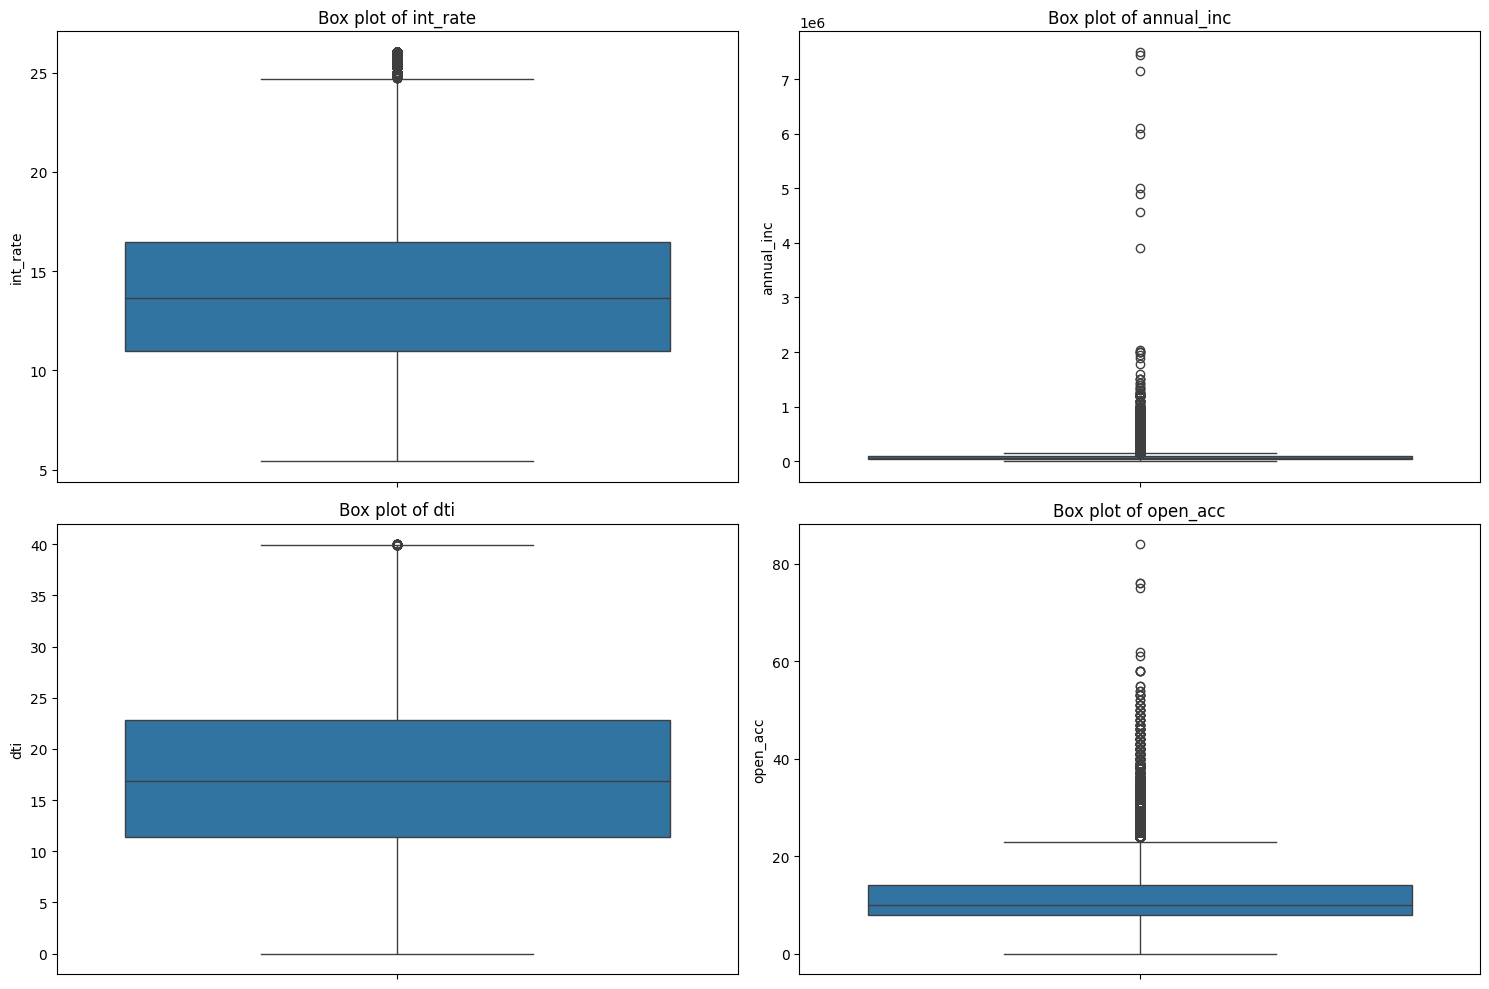


Feature: int_rate
  Number of outliers: 4904
  Percentage of outliers: 1.05%
  Lower bound: 2.74
  Upper bound: 24.74

Feature: annual_inc
  Number of outliers: 19899
  Percentage of outliers: 4.27%
  Lower bound: -20940.00
  Upper bound: 154900.00

Feature: dti
  Number of outliers: 43
  Percentage of outliers: 0.01%
  Lower bound: -5.77
  Upper bound: 39.91

Feature: open_acc
  Number of outliers: 10440
  Percentage of outliers: 2.24%
  Lower bound: -1.00
  Upper bound: 23.00


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features_for_outliers = ['int_rate', 'annual_inc', 'dti', 'open_acc']

print("Outlier Detection using IQR")

# Create box plots for visual identification of outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=loan[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Quantify outliers using the IQR method
for col in numerical_features_for_outliers:
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = loan[(loan[col] < lower_bound) | (loan[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(loan)) * 100

    print(f"\nFeature: {col}")
    print(f"  Number of outliers: {num_outliers}")
    print(f"  Percentage of outliers: {percentage_outliers:.2f}%")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")

In [15]:
# Define the numerical features for which to remove outliers
numerical_features_for_outliers = ['int_rate', 'annual_inc', 'dti', 'open_acc']

# Create a copy to ensure we are modifying the intended DataFrame
loan_cleaned = loan.copy()

# Iterate through each feature to remove its outliers
for col in numerical_features_for_outliers:
    Q1 = loan_cleaned[col].quantile(0.25)
    Q3 = loan_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers for the current column
    loan_cleaned = loan_cleaned[(loan_cleaned[col] >= lower_bound) & (loan_cleaned[col] <= upper_bound)]

print(f"Original number of rows: {len(loan)}")
print(f"Number of rows after outlier removal: {len(loan_cleaned)}")

# Update the 'loan' DataFrame to the cleaned version
loan = loan_cleaned


Original number of rows: 466285
Number of rows after outlier removal: 432404


In [16]:
# Display the shape of the DataFrame after outlier removal
display(loan.shape)

(432404, 76)


--- Outlier Detection using IQR ---


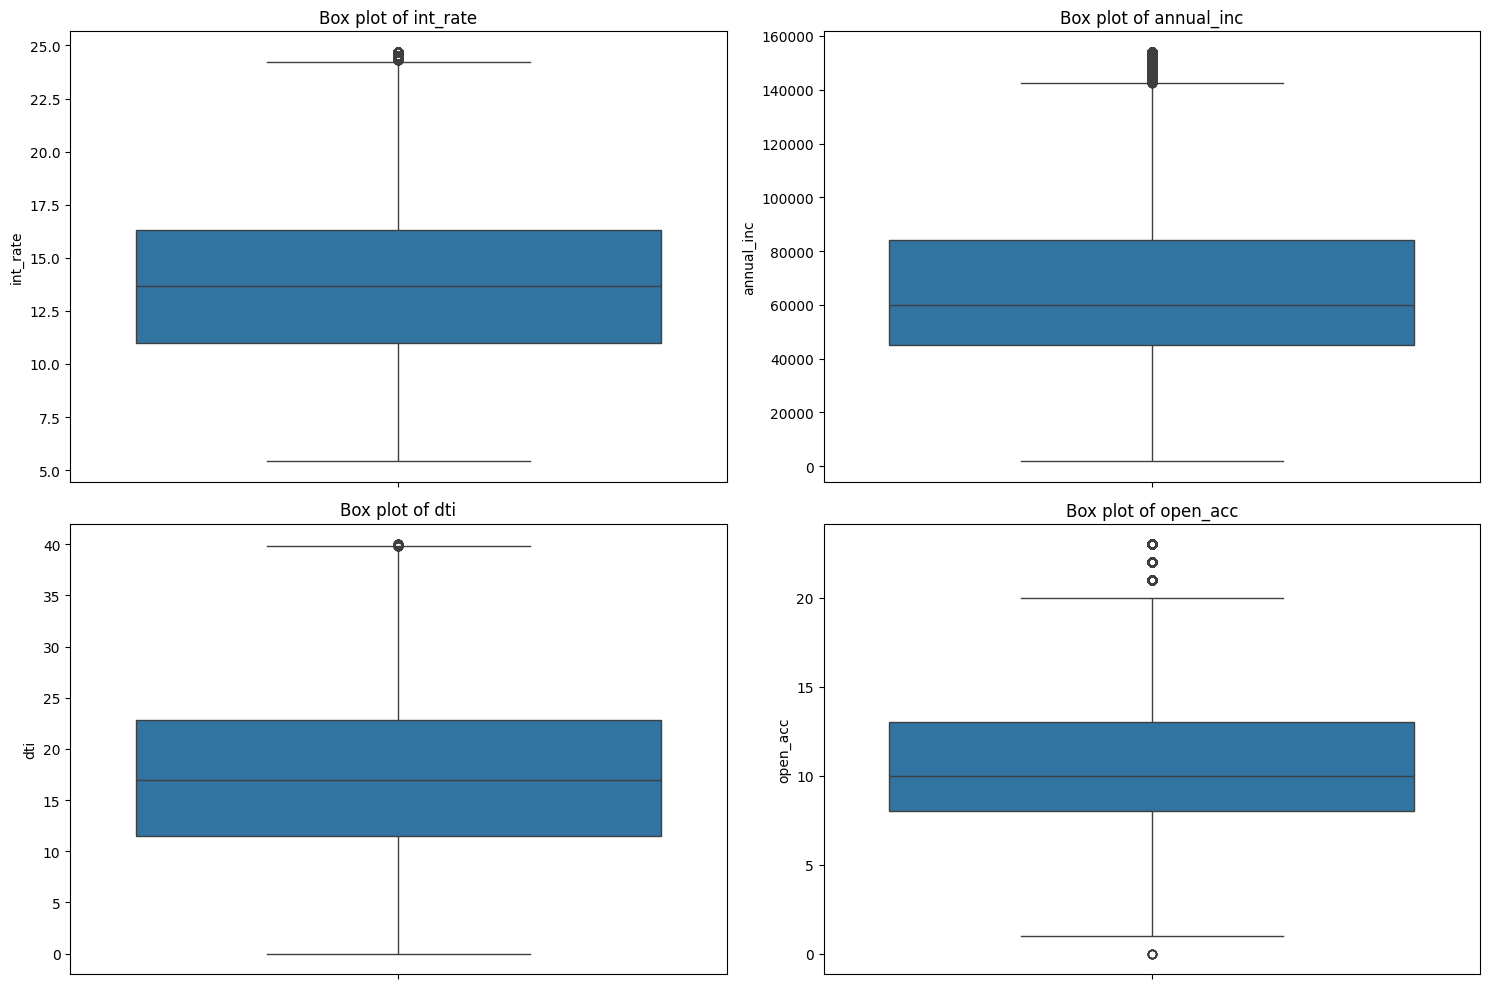


Feature: int_rate
  Number of outliers: 1950
  Percentage of outliers: 0.45%
  Lower bound: 3.04
  Upper bound: 24.24

Feature: annual_inc
  Number of outliers: 6741
  Percentage of outliers: 1.56%
  Lower bound: -13500.00
  Upper bound: 142500.00

Feature: dti
  Number of outliers: 96
  Percentage of outliers: 0.02%
  Lower bound: -5.43
  Upper bound: 39.82

Feature: open_acc
  Number of outliers: 11403
  Percentage of outliers: 2.64%
  Lower bound: 0.50
  Upper bound: 20.50


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features_for_outliers = ['int_rate', 'annual_inc', 'dti', 'open_acc']

print("\n--- Outlier Detection using IQR ---")

# Create box plots for visual identification of outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=loan[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Quantify outliers using the IQR method
for col in numerical_features_for_outliers:
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = loan[(loan[col] < lower_bound) | (loan[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(loan)) * 100

    print(f"\nFeature: {col}")
    print(f"  Number of outliers: {num_outliers}")
    print(f"  Percentage of outliers: {percentage_outliers:.2f}%")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")

In [18]:
# Drop the irrelevant columns with missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
loan.drop(columns=columns_to_drop, inplace=True, axis=1)

loan.dropna(inplace=True)

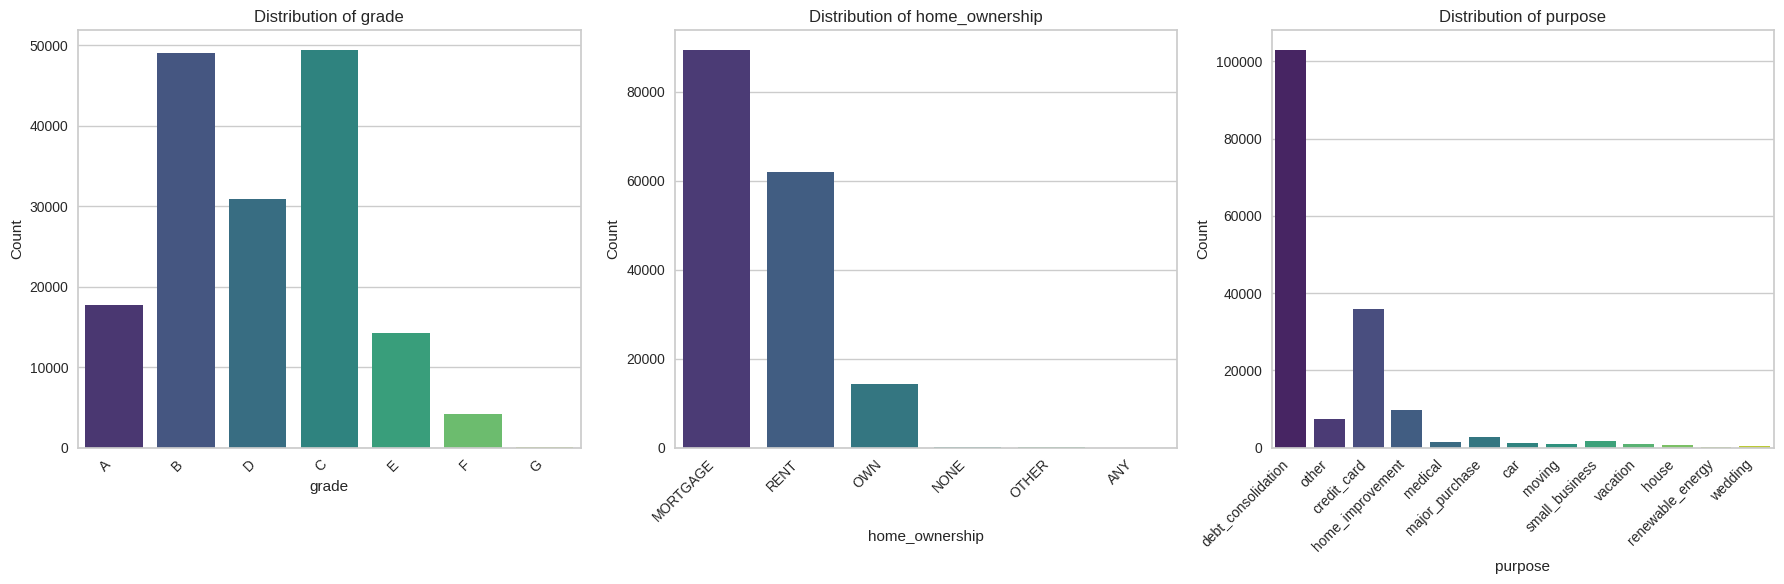

In [57]:
# Categorical features for bar charts
categorical_features_for_bar_charts = ['grade', 'home_ownership', 'purpose']

plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_features_for_bar_charts, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=loan, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Drop some multicollinear functions (that have correlation value 1)
loan.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

<Axes: >

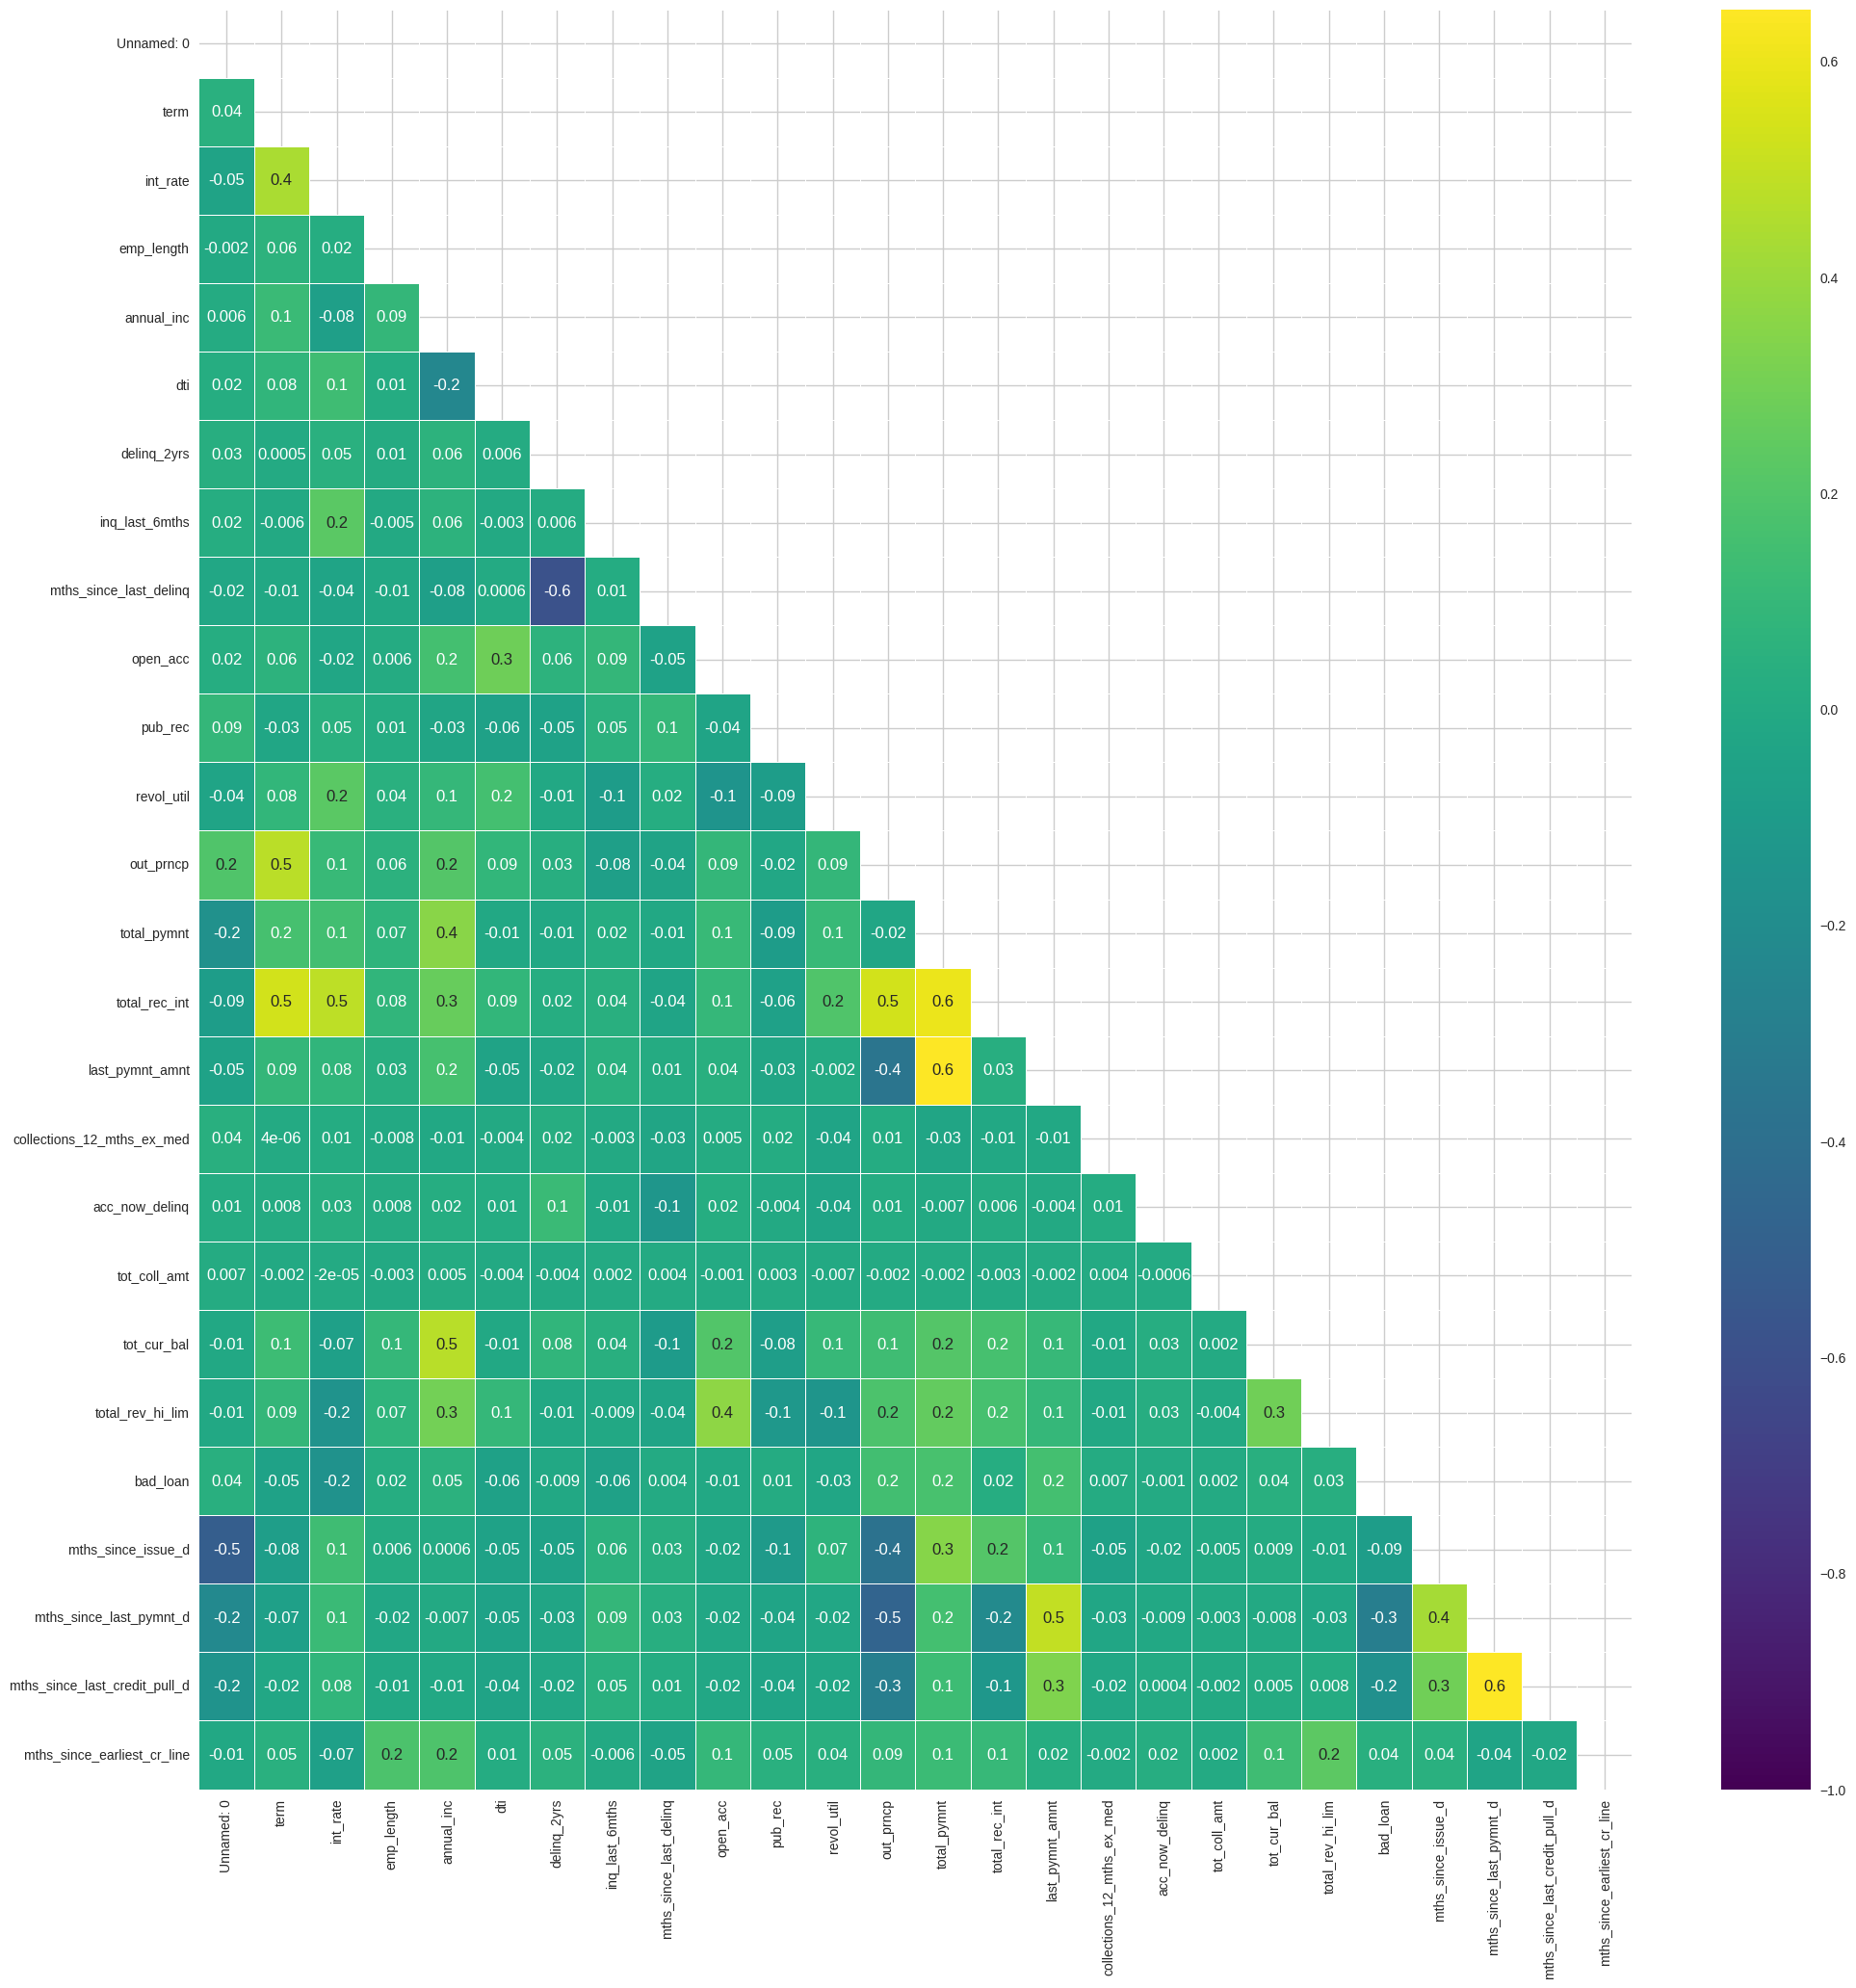

In [58]:
# Recreate the correlation matrix
mask = np.zeros_like(numeric_loan.corr().fillna(0), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(numeric_loan.corr(), mask=mask, annot=True,  cmap="viridis", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [23]:
# Find the dataframe's
loan.describe()

,Unnamed: 0,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
count,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,...,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,165582.000000,1.655820e+05,1.655820e+05,1.655820e+05,165582.000000
mean,262214.388025,42.635794,14.322637,70454.781375,17.573188,0.623214,0.796131,34.011499,11.257794,0.188318,...,5020.950494,10817.331061,2550.695689,3035.460194,0.016119,0.009276,3.285113e+02,1.363638e+05,2.529719e+04,0.902411
std,125405.289414,10.734337,4.048286,29024.242860,7.730656,1.078444,1.037216,21.743146,4.241833,0.543781,...,6368.245506,7650.677415,2332.504355,5399.097090,0.148592,0.103908,2.258746e+04,1.331157e+05,2.173876e+04,0.296759
min,42537.000000,36.000000,6.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,148063.000000,36.000000,11.670000,49000.000000,11.790000,0.000000,0.000000,15.000000,8.000000,0.000000,...,0.000000,5350.142500,1007.202500,313.565000,0.000000,0.000000,0.000000e+00,3.053425e+04,1.200000e+04,1.000000
50%,274897.500000,36.000000,14.160000,65000.000000,17.120000,0.000000,0.000000,31.000000,11.000000,0.000000,...,2492.620000,8831.265000,1850.745000,517.410000,0.000000,0.000000,0.000000e+00,8.819100e+04,1.980000e+04,1.000000
75%,370444.750000,60.000000,16.990000,89000.000000,23.040000,1.000000,1.000000,49.000000,14.000000,0.000000,...,8399.605000,14106.070000,3249.095000,3056.562500,0.000000,0.000000,0.000000e+00,2.108570e+05,3.210000e+04,1.000000
max,466284.000000,60.000000,24.700000,154000.000000,39.990000,29.000000,7.000000,188.000000,23.000000,18.000000,...,31898.770000,56087.909920,21702.150000,36004.610000,20.000000,5.000000,9.152545e+06,1.506481e+06,1.008700e+06,1.000000


In [24]:
# converting emp_length to numeric and assign NaN to zero

def emp_length_convert(data, column):
    # Check if the column is already numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        print(f"Column '{column}' is already numeric. Skipping string operations.")
    else:
        data[column] = data[column].str.replace(r'\+ years', '', regex=True)
        data[column] = data[column].str.replace('< 1 year', str(0), regex=False)
        data[column] = data[column].str.replace(' years', '', regex=False)
        data[column] = data[column].str.replace(' year', '', regex=False)
    data[column] = pd.to_numeric(data[column])
    data[column] = data[column].fillna(value = 0)


emp_length_convert(loan, 'emp_length')

loan['emp_length'].unique()

array([10,  2,  4,  7,  6,  5,  3,  1,  0,  9,  8])

In [25]:
# converting term to numeric

def term_numeric(data, column):
    data[column] = pd.to_numeric(data[column].str.replace(' months', ''))
    term_numeric(data, 'term')

In [26]:
loan['term'].dtype

dtype('int64')

In [28]:
# seperating categorical features from numerical
categorical_features = loan.select_dtypes(exclude='number')
numerical_features = loan.select_dtypes(exclude='object')

In [29]:
preprocess_data = loan

#checking for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

,0


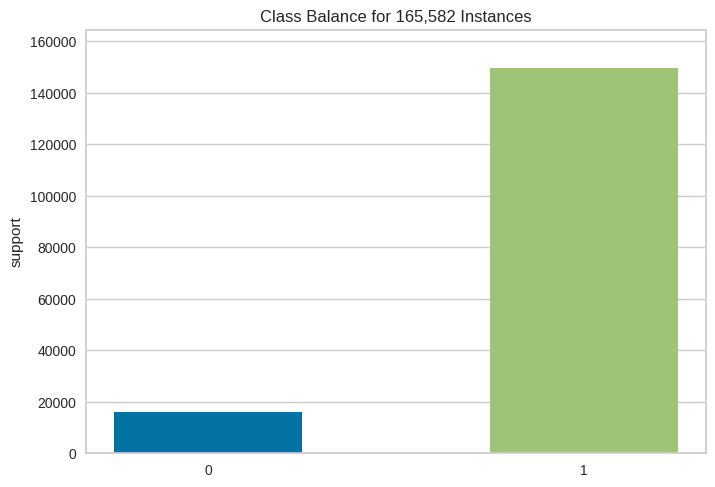

<Axes: title={'center': 'Class Balance for 165,582 Instances'}, ylabel='support'>

In [31]:
#check if class labels are balanced

from yellowbrick.target import ClassBalance
X= preprocess_data.drop(columns='bad_loan', axis=1)
y = preprocess_data['bad_loan']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

In [33]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance for training dataset
y_train.value_counts()

,count
bad_loan,
1,119606
0,12859


In [34]:
#dealing with imbalanced data
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

,count
bad_loan,
1,119606
0,119606


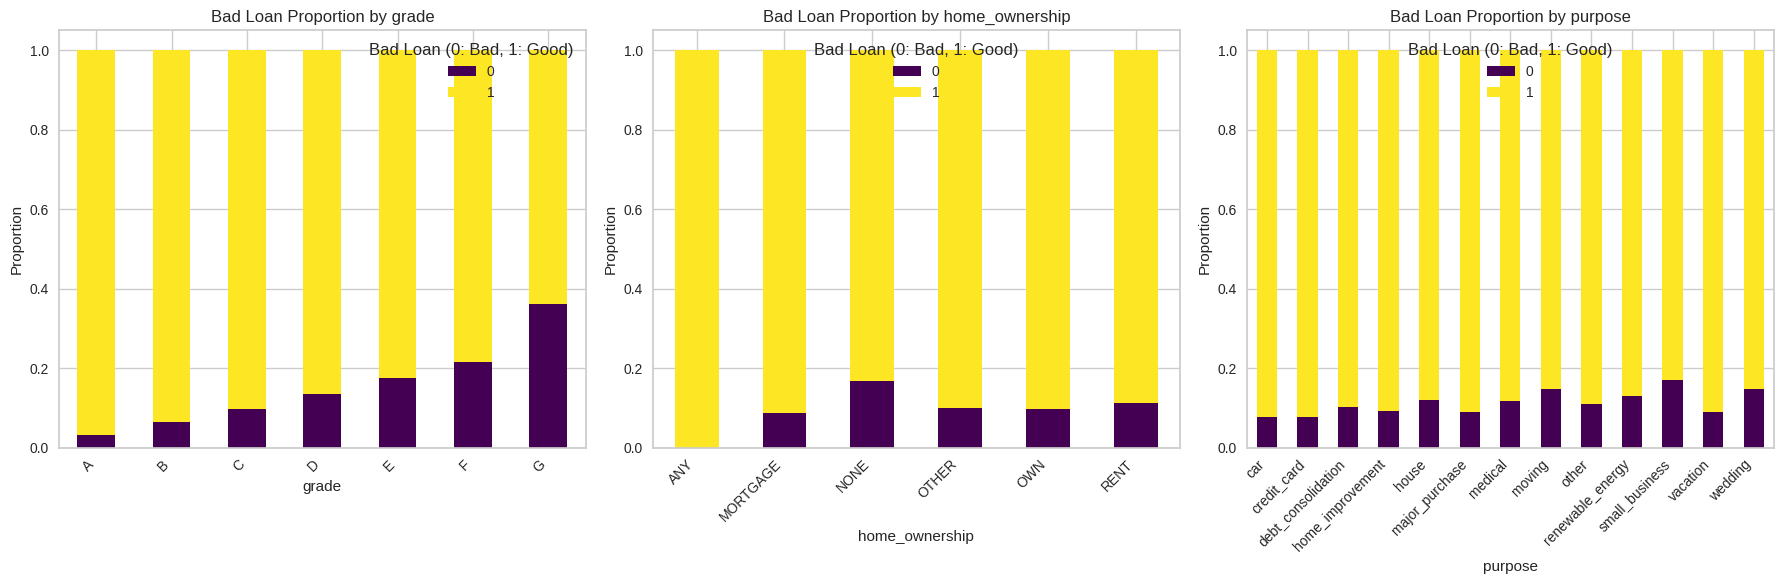

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorical features for stacked bar charts against 'bad_loan'
categorical_features_for_bar_charts = ['grade', 'home_ownership', 'purpose']

plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_features_for_bar_charts, 1):
    plt.subplot(1, 3, i)
    # Calculate the proportion of 'bad_loan' within each category
    cross_tab_prop = pd.crosstab(loan[col], loan['bad_loan'], normalize='index')
    cross_tab_prop.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Bad Loan Proportion by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Bad Loan (0: Bad, 1: Good)')
plt.tight_layout()
plt.show()

In [35]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Identify categorical columns
categorical_cols = X_train_o.select_dtypes(include='object').columns

# Apply one-hot encoding to training and test data
X_train_o_encoded = pd.get_dummies(X_train_o, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns - crucial if some categories are in train but not test or vice versa
X_train_o_encoded, X_test_encoded = X_train_o_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

model = LogisticRegression(solver='liblinear', random_state=42) # Added solver and random_state for reproducibility
model.fit(X_train_o_encoded, y_train_o)

LogisticRegression(random_state=42, solver='liblinear')

In [36]:
#predicting
from sklearn.metrics import classification_report
y_preds = model.predict(X_test_encoded)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69      3300
           1       0.98      0.93      0.96     29817

    accuracy                           0.92     33117
   macro avg       0.78      0.89      0.83     33117
weighted avg       0.94      0.92      0.93     33117



In [37]:
y_preds

array([1, 1, 1, ..., 1, 1, 1])

Confusion Matrix:
[[ 2832   468]
 [ 2039 27778]]


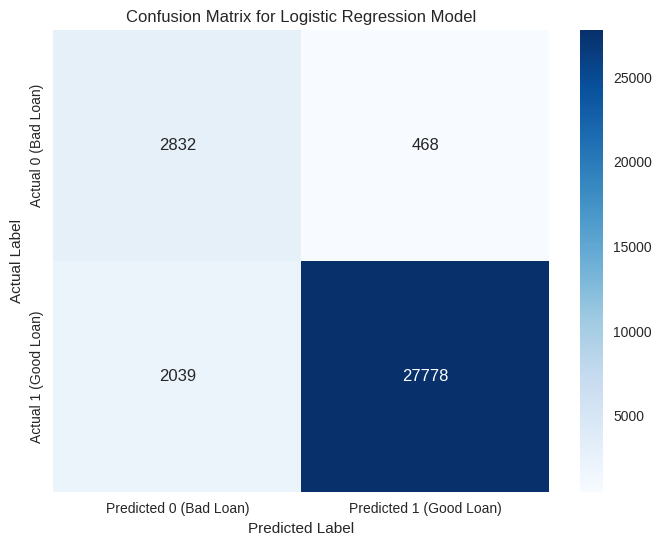

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Bad Loan)', 'Predicted 1 (Good Loan)'],
            yticklabels=['Actual 0 (Bad Loan)', 'Actual 1 (Good Loan)'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Create and train Random Forest model


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_o_encoded, y_train_o)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [63]:
y_preds_rf = rf_model.predict(X_test_encoded)
print("Predictions made successfully using the Random Forest model.")

Predictions made successfully using the Random Forest model.


In [61]:
from sklearn.metrics import classification_report

# Generate classification report for Random Forest model
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_preds_rf))

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00     29817

    accuracy                           1.00     33117
   macro avg       1.00      1.00      1.00     33117
weighted avg       1.00      1.00      1.00     33117



Confusion Matrix for Random Forest Model:
[[ 3298     2]
 [    0 29817]]


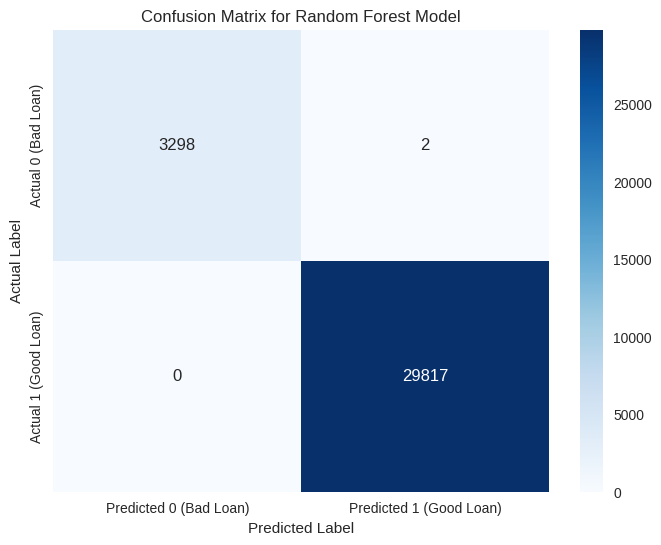

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_preds_rf)

# Print the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(cm_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Bad Loan)', 'Predicted 1 (Good Loan)'],
            yticklabels=['Actual 0 (Bad Loan)', 'Actual 1 (Good Loan)'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [68]:
pd.Series(y_preds_rf).value_counts() # Find out how many good and bad loans from the customers

,count
1,29819
0,3298
